# Homework 6

## PHYS 2600

__Important notice:__ All cells in your notebook will be run, start to finish, using a fresh kernel when it is graded!  To make sure the graded notebook looks like what you expect, we recommend restarting the kernel and selecting "Cells > Run All" in the menu above before you submit.

In [1]:
# Import cell

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

If you worked collaboratively on this assignment, __include the names of your collaborators in the cell below:__

## 6.0 - Homework correction (3 points)

In the cell below, explain and correct __one mistake__ you made on homework #4.  If you got a perfect score, great, tell us what your favorite problem was, or use the space to give any other feedback you might have on the class/tutorials/homework.

## 6.1 - Factorials, loops, and recursion (12 points)

### Part A (3 points)

The factorial function $n!$ is defined as the product of all numbers from 1 to $n$:

$$
n! = n \times (n-1) \times (n-2) ... 2 \times 1
$$

Implement the factorial function as `fact(n)` below, __using a `while` loop.__  The factorial is defined for any non-negative integer, including zero ($0! = 1$); _make sure your code handles this edge case properly._  

Note: __passing the visible tests does not guarantee you a perfect score.__  You should try a few test cases of your own to make sure your function works completely!

In [2]:
def fact(n):
    """
    Return the factorial n!.

    n must be a non-negative integer (>= 0.)
    """

    # Factorial is defined for non-negative integers only.
    # Better to cause an error than to return a bad result!
    assert type(n) == int
    assert n >= 0

    ### BEGIN SOLUTION
    fact = 1
    i = 2
    while i <= n:
        fact *= i
        i += 1

    return fact
    ### END SOLUTION

In [3]:
assert fact(2) == 2
assert fact(5) == 120
assert fact(1) == 1

In [4]:
# Hidden testing cell - do not delete!

### BEGIN HIDDEN TESTS
assert fact(0) == 1
assert fact(7) == 5040
assert fact(30) == 265252859812191058636308480000000
### END HIDDEN TESTS

### Part B (3 points)

A less familiar but related function is the __double factorial__ or __semifactorial__, $n!!$, which is defined just like the factorial but uses every _other_ number in the product:

$$
n!! = \begin{cases}
n \times (n-2) \times (n-4) ... \times 3 \times 1, & (n\ {\rm odd}); \\
n \times (n-2) \times (n-4) ... \times 4 \times 2, & (n\ {\rm even}); \\
\end{cases}
$$

__Implement the double factorial function `double_fact(n)` below__, again __using a `while` loop.__  Once again, assume $n$ is a non-negative integer, and make sure you reproduce the special case $0!! = 1$.



In [5]:
def double_fact(n):
    """
    Return the 'double factorial' n!!.

    n must be a non-negative integer.
    """

    assert type(n) == int
    assert n >= 0

    ### BEGIN SOLUTION
    if n == 0:
        return 1

    if (n % 2) == 0:
        dfact = 2
    else:
        dfact = 1

    # n!! starts with either 2*4 or 1*3
    ii = dfact + 2

    while ii <= n:
        dfact *= ii
        ii += 2

    return dfact

    ### END SOLUTION

In [6]:
assert double_fact(1) == 1
assert double_fact(7) == 105
assert double_fact(4) == 8

In [7]:
# Hidden testing cell - do not delete!

### BEGIN HIDDEN TESTS
assert double_fact(3) == 3
assert double_fact(18) == 185794560
assert double_fact(0) == 1
### END HIDDEN TESTS

### Part C (3 points)

As we've seen a few times, function definitions in Python aren't limited to simple statements; we can also call _other_ functions from inside a function.  In fact, it is valid Python to _call the function we are defining from inside itself!_  When the definition of a function includes the function itself, the function is said to be __recursive__.

Recursion is well-suited to simplifying certain problems, and is a powerful technique that you should know about!  The factorial is particularly easy to implement with recursion, since it satisfies the identity

$$
n! = n \times (n-1)!
$$

which leads to the following simple implementation:


In [8]:
def recursive_fact(n):
    if n <= 1:
        return 1

    return n * recursive_fact(n - 1)


print(recursive_fact(13) == fact(13))
print(recursive_fact(1) == fact(1))
print(recursive_fact(0) == fact(0))

True
True
True


Think about the execution: when you call `recursive_fact(n)`, __which numbers does the computer multiply together first?__  Is it `2*1`, or `n*(n-1)`?  __Explain your reasoning!__

_(Hint: try to follow the code through explicitly for a modest value of `n`, say 4.  It's hard to use `print` to diagnose what's happening, but the Python Tutor may help.)_

__Python has to evaluate the function in `n * recursive_fact(n-1)`, before it can actually multiply anything!  (If you add print statements, you'll see the function is called in `recursive_fact(4)` for 4, then 3, then 2, then finally 1.)__

__So, the function recurses until 1 is returned, and then starts multiplying: `recursive_fact(2)` returns `2*1`, `recursive_fact(3)` returns `3 * recursive_fact(2) = 3 * 2 = 6`, and so on.  The `2*1` happens first!__

There are some drawbacks to recursion; for one thing, recursion is simply slower than iteration in Python, as the usage of memory piles up with every layer of recursion.  (Of course, both functions still take microseconds to run, so maybe the trade-off is worth it for a clearer implementation in this case!)  

Recursion also gives us another way to generate an infinite loop in principle, if we're not careful about termination of the recursive function calls.  (In practice, Python has a __recursion limit__, so if a function calls itself too many times the kernel will simply give an error.)

### Part D (3 points)

Now, your turn: __implement the double factorial $n!!$ using recursion.__  (Your answer should be much shorter than the iterative one above!)

In [9]:
def rec_double_fact(n):
    ### BEGIN SOLUTION
    if n <= 1:
        return 1

    return n * rec_double_fact(n - 2)
    ### END SOLUTION

In [10]:
assert rec_double_fact(0) == 1
assert rec_double_fact(11) == 10395
assert rec_double_fact(18) == 185794560

In [11]:
# Hidden testing cell - do not delete!

### BEGIN HIDDEN TESTS
assert rec_double_fact(2) == 2
assert rec_double_fact(23) == 316234143225
### END HIDDEN TESTS

## 6.2 - Debugging and Fizzbuzz (8 points)

There are a lot of ways to solve the famous FizzBuzz programming problem (see the worked example on tutorial 9.)  Here are a couple of possible solutions.  The only problem is, they have some bugs in them!  __Debug the code examples__ so that they correctly produce the FizzBuzz sequence from 1 to 30.

_(Note: you should fix the code examples, but make sure you use the same basic algorithm to produce the sequence.  In other words, you can't just copy/paste the solution to tutorial 11 three times to get this problem right!)_

### Part A

This method uses a pair of "counter" variables to find multiples of 3 and 5 without the use of the `%` operator.

In [12]:
## Read-only code cell: give your solution in the next cell below.

i = 1
fizz_count = 0
buzz_count = 0
while i <= 30:
    s = ""
    fizz_count += 1
    buzz_count += 1
    if fizz_count == 3:
        s += "Fizz"
        fizz_count = 1
    if buzz_count == 5:
        s += "Buzz"
        buzz_count = 1

    if s == "":
        print(i)
    else:
        print(s)

    i += 1

1
2
Fizz
4
FizzBuzz
6
Fizz
8
FizzBuzz
10
Fizz
12
FizzBuzz
14
Fizz
16
FizzBuzz
18
Fizz
20
FizzBuzz
22
Fizz
24
FizzBuzz
26
Fizz
28
FizzBuzz
30


In [13]:
### BEGIN SOLUTION
# The idea of using counters is fine, but they are being reset incorrectly:
# after the initial few numbers, "Fizz" appears every 2 numbers and "Buzz" every 4.
# Resetting the counters to 0 instead of 1 inside the loop will fix the code.

i = 1
fizz_count = 0
buzz_count = 0
while i <= 30:
    s = ""
    fizz_count += 1
    buzz_count += 1
    if fizz_count == 3:
        s += "Fizz"
        fizz_count = 0
    if buzz_count == 5:
        s += "Buzz"
        buzz_count = 0

    if s == "":
        print(i)
    else:
        print(s)

    i += 1
### END SOLUTION

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz


### Part B

This solution skips the `while` loop, instead using NumPy arrays and masks to implement FizzBuzz.

In [14]:
## Read-only code cell: give your solution in the next cell below.

all_numbers = np.arange(0, 30)

div_3_mask = all_numbers % 3
div_5_mask = all_numbers % 5

all_numbers = np.array(all_numbers, str)
all_numbers[div_3_mask] = "Fizz"
all_numbers[div_5_mask] = "Buzz"
all_numbers[np.logical_and(div_3_mask, div_5_mask)] = "FizzBuzz"

print(all_numbers)

['Buzz' 'FizzBuzz' 'FizzBuzz' 'Buzz' 'FizzBuzz' '5' '6' 'FizzBuzz'
 'FizzBuzz' '9' '10' 'FizzBuzz' '12' 'FizzBuzz' 'FizzBuzz' '15' 'FizzBuzz'
 'FizzBuzz' '18' 'FizzBuzz' '20' '21' 'FizzBuzz' 'FizzBuzz' '24' '25'
 'FizzBuzz' '27' 'FizzBuzz' 'FizzBuzz']


In [15]:
### BEGIN SOLUTION
# The Fizz and Buzz masks are backwards: they're masking numbers that
# *aren't* multiples of 3 and 5!  Also, the np.arange is off by one;
# it should go from 1 to 31 (so it ends including 30.)

all_numbers = np.arange(1, 31)

div_3_mask = all_numbers % 3 == 0
div_5_mask = all_numbers % 5 == 0

all_numbers = np.array(all_numbers, str)
all_numbers[div_3_mask] = "Fizz"
all_numbers[div_5_mask] = "Buzz"
all_numbers[np.logical_and(div_3_mask, div_5_mask)] = "FizzBuzz"

print(all_numbers)
### END SOLUTION

['1' '2' 'Fizz' '4' 'Buzz' 'Fizz' '7' '8' 'Fizz' 'Buzz' '11' 'Fizz' '13'
 '14' 'FizzBuzz' '16' '17' 'Fizz' '19' 'Buzz' 'Fizz' '22' '23' 'Fizz'
 'Buzz' '26' 'Fizz' '28' '29' 'FizzBuzz']


## 6.3 - Ballistics, masks, and bouncing balls (18 points)

There are some interesting problems that we can now solve (and visualize) with the help of the computer, even in something as simple as one-dimensional motion under gravity.  For a projectile moving vertically with initial height $y_0$ and speed $v_0$, its motion as a function of time will be described by the equation

$$
y(t) = y_0 + v_0 t - \frac{1}{2} gt^2.
$$

As we've seen, NumPy arrays enable us to work with large sets of structured data easily - so we can compute the _entire trajectory_ $y(t)$ at once as a single array.  We can use this to add in a complication: what happens when our projectile meets the ground?

### Part A (4 points)

To start with, we assume our projectile is a __lump of clay__: if it hits the ground (which we define to be `y=0`), then it will just stick there.

__Implement the function `traj_y_clay(t, v_0, y_0)` below__, which returns the array `y(t)` according to the formula above, computed for the array of `t` values given as input.  Again, as soon as the lump of clay hits the ground at `y=0`, the trajectory from that point should just be `y=0` for any larger `x`!   

_(Hint: you should implement this by computing `y(t)` ignoring the ground, and then using a mask to zero out the trajectory after it hits the ground.)_


In [16]:
g = 9.8  ## m/s^2


def traj_y_clay(t, v_0, y_0=0):
    """
    Computes y(t) for 1-d projectile motion.
    Projectile is a lump of clay, which sticks to the ground
    at y=0 as soon as it hits.

    Arguments:
    - t: array of t-values to compute the motion for.
    - v_0: initial speed in the y-direction.
    - y_0: starting height (must be non-negative!)

    Returns:
    - y: array containing the trajectory y(t).

    """

    assert y_0 >= 0

    ### BEGIN SOLUTION
    # Compute trajectory, ignoring the ground
    y = y_0 + v_0 * t - 0.5 * g * t**2

    # Now use a mask: anywhere that y(t) is negative
    # should be y=0 instead.
    y[y < 0] = 0.0

    return y
    ### END SOLUTION

In [17]:
import numpy.testing as npt

t_test = np.linspace(0, 1, 5)
y1_test = np.array([0.0, 0.6938, 0.775, 0.2438, 0.0])

print(traj_y_clay(t_test, 4))

npt.assert_allclose(traj_y_clay(t_test, 0), np.zeros(5), rtol=1e-3)
npt.assert_allclose(traj_y_clay(t_test, 4), y1_test, rtol=1e-3)

[0.      0.69375 0.775   0.24375 0.     ]


In [18]:
# Hidden testing cell - do not delete!

### BEGIN HIDDEN TESTS
y2_test = np.array([0.5, 1.1938, 1.275, 0.7438, 0.0])

print(traj_y_clay(t_test, -4))
print(traj_y_clay(t_test, 4, y_0=0.5))

npt.assert_allclose(traj_y_clay(t_test, -4), np.zeros(5), rtol=1e-3)
npt.assert_allclose(traj_y_clay(t_test, 4, y_0=0.5), y2_test, rtol=1e-3)
### END HIDDEN TESTS

[0. 0. 0. 0. 0.]
[0.5     1.19375 1.275   0.74375 0.     ]


### Part B (2 points)

Let's have a closer look at the trajectories with some plots.  First, __plot `traj_y_clay(t)` below__, for $v_0 = 3$ m/s and $t$ over the range 0 to 1 second, and two different values of y_0: `y_0=0` and `y_0=0.8`.

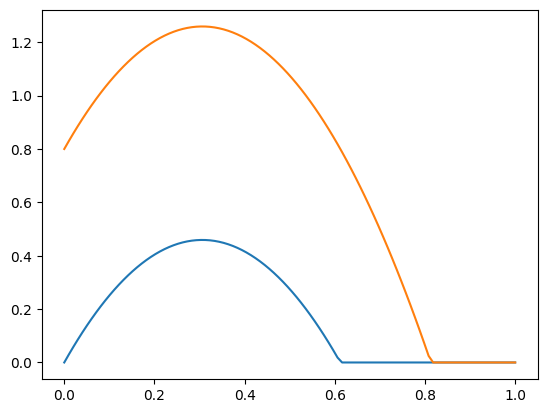

In [19]:
### BEGIN SOLUTION
t = np.linspace(0, 1, 100)
yc_1 = traj_y_clay(t, 3)
yc_2 = traj_y_clay(t, 3, y_0=0.8)

plt.plot(t, yc_1)
plt.plot(t, yc_2)
### END SOLUTION

### Part C (8 points)

Alright, lumps of clay can only do so much.  A more interesting version of this problem is to simulate the motion of a __bouncing ball__, which will fly up into the air again once it hits the ground. This will give us hours of fun for the whole family.  

The simplest way to model a bouncing ball is using the __coefficient of restitution__ $e$, which is equal to the ratio of incoming to outgoing speed when the ball bounces.  For example, a tennis ball with $e = 0.75$ that hits the ground at 4 m/s will bounce back up with a speed of 3 m/s - after which it obeys the same simple equation of motion as above.

__Implement a new function `bounce_y(t, v_0, e)`__ that will produce the trajectory of a bouncing ball.

<i>(Hint: the art of this solution is all in finding a good algorithm!  My suggestion is the following, which is nicely adapted to a `while` loop:)

* Start by calculating the full $y(t)$ without bouncing, letting $y$ go negative.
* Now, look for where the current trajectory $y$ is negative: that entire part of the trajectory should be replaced by a new trajectory that starts with a bounce.
* The starting speed of the bounce is equal to the _ending_ speed of the previous trajectory, times the coefficient of restitution $e$.  You could calculate $v(t)$, but there's a very simple relation between the initial and final speeds due to energy conservation - remember, energy is still conserved in between bounces!  __Don't forget to include $y_0$ in your conservation of energy calculation...__ you should sketch this out on paper first.
* Repeat the steps above until there are no negative $y$ values left.

The `np.any()` function will definitely come in handy for your `while` loop.  For replacing only the negative part of `y`, you'll need a mask - and remember, when assigning to a mask of an array `a[mask] = b`, the array `b` had better be the same length as `a[mask]`...)


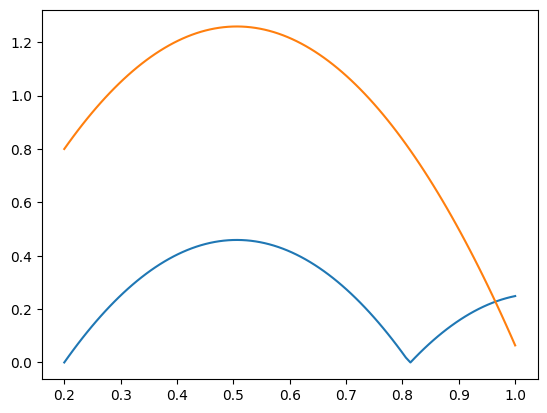

In [20]:
import matplotlib.pyplot as plt
import numpy as np

g = 9.8  ## m/s^2


def traj_y_bounce(t, v_0, y_0=0, e=0.75):
    """
    Computes y(t) for 1-d projectile motion.
    Projectile is a bouncing ball, with coefficient of
    restitution e.

    The ground is taken to be at y=0.

    Arguments:
    - t: array of t-values to compute the motion for.
    - v_0: initial speed in the y-direction.
    - y_0: starting height (must be non-negative!) [default: 0.]
    - e: coefficient of restitution [default: 0.75.]

    Returns:
    - y: array containing the trajectory y(t).

    """

    ### BEGIN SOLUTION
    t = np.array(t) - t[0]  # make sure t starts at 0
    y = y_0 + v_0 * t - 0.5 * g * t**2  # trajectory without bounces
    v_i = v_0
    y_i = y_0
    while np.any(y < 0):
        # find speed when the ball next hits the ground
        v_hit = np.sqrt(v_0**2 + 2 * g * y_0)
        # speed that the ball leaves the ground after the bounce
        v_0 = e * v_hit
        # Use a mask to replace the post-bounce trajectory and reset t so it starts counting from 0
        negative_mask = y < 0
        t = t[negative_mask]
        t -= t[0]
        y[negative_mask] = v_0 * t - 0.5 * g * t**2

        # y_0 is zero for the next bounce
        y_0 = 0.0
    return y


### BEGIN SOLUTION
t = np.linspace(0.2, 1, 100)
yc_1 = traj_y_bounce(t, 3)
yc_2 = traj_y_bounce(t, 3, y_0=0.8)

plt.plot(t, yc_1)
plt.plot(t, yc_2)
### END SOLUTION

In [21]:
import numpy.testing as npt

# Simple tests
t_test = np.linspace(0, 1, 200)

## If v_0 is high enough, it won't bounce, so we get the same answer as for clay
npt.assert_allclose(
    traj_y_bounce(t_test, 10, y_0=0.0, e=0.75), traj_y_clay(t_test, 10, y_0=0.0)
)

## Testing known solution with a single bounce
t_short_test = np.linspace(0, 1, 10)

known_traj = np.array(
    [
        0.0,
        0.32839506,
        0.53580247,
        0.62222222,
        0.58765432,
        0.43209877,
        0.15555556,
        0.0,
        0.23117284,
        0.34135802,
    ]
)

print(traj_y_bounce(t_short_test, 3.5, y_0=0.0, e=0.75))

npt.assert_allclose(traj_y_bounce(t_short_test, 3.5, y_0=0.0, e=0.75), known_traj)

[0.         0.32839506 0.53580247 0.62222222 0.58765432 0.43209877
 0.15555556 0.         0.23117284 0.34135802]


In [22]:
# More challenging tests, for common mistakes.
# If you fail this cell, ask yourself these questions:
## What does your function do if y_0 is positive?  Plot it - does it look right?
## What does your function do if v_0 is negative?  Plot it - does it look right?
# Remember, right after a bounce the trajectory you find starts at the ground (y=0),
# and it definitely starts with v pointing up.

t_short_test_2 = np.linspace(0, 1, 20)

known_traj_2bounce = np.array(
    [
        0.0,
        0.11800554,
        0.20886427,
        0.27257618,
        0.30914127,
        0.31855956,
        0.30083102,
        0.25595568,
        0.18393352,
        0.08476454,
        0.0,
        0.0851108,
        0.14307479,
        0.17389197,
        0.17756233,
        0.15408587,
        0.1034626,
        0.02569252,
        0.0,
        0.06043975,
    ]
)

known_traj_y0 = np.array(
    [
        0.4,
        0.62839506,
        0.73580247,
        0.72222222,
        0.58765432,
        0.33209877,
        0.0,
        0.25792239,
        0.39485713,
        0.41080421,
    ]
)

known_traj_v0_negative = np.array(
    [
        0.5,
        0.0,
        0.43110221,
        0.74121677,
        0.93034368,
        0.99848293,
        0.94563452,
        0.77179846,
        0.47697475,
        0.06116338,
    ]
)


print(traj_y_bounce(t_short_test_2, 2.5, y_0=0.0, e=0.75))

print(traj_y_bounce(t_short_test, 2.6, y_0=0.4, e=0.75))


npt.assert_allclose(
    traj_y_bounce(t_short_test_2, 2.5, y_0=0.0, e=0.75), known_traj_2bounce
)

npt.assert_allclose(traj_y_bounce(t_short_test, 2.6, y_0=0.4, e=0.75), known_traj_y0)

npt.assert_allclose(
    traj_y_bounce(t_short_test, -5, y_0=0.5, e=0.75), known_traj_v0_negative
)

IndexError: boolean index did not match indexed array along axis 0; size of axis is 10 but size of corresponding boolean axis is 20

In [ ]:
# Hidden testing cell - do not delete!

### BEGIN HIDDEN TESTS
known_traj_e04 = np.array(
    [
        0.0,
        0.11800554,
        0.20886427,
        0.27257618,
        0.30914127,
        0.31855956,
        0.30083102,
        0.25595568,
        0.18393352,
        0.08476454,
        0.0,
        0.04563712,
        0.06412742,
        0.05547091,
        0.01966759,
        0.0,
        0.01307133,
        0.0,
        0.0,
        0.0,
    ]
)

known_traj_down = np.array(
    [
        2.0,
        1.67063712,
        1.31412742,
        0.93047091,
        0.51966759,
        0.08171745,
        0.0,
        0.28309321,
        0.5390396,
        0.76783918,
        0.96949194,
        1.14399789,
        1.29135703,
        1.41156935,
        1.50463486,
        1.57055355,
        1.60932543,
        1.62095049,
        1.60542874,
        1.56276018,
    ]
)

print(repr(traj_y_bounce(t_short_test_2, 2.5, y_0=0.0, e=0.45)))
print(repr(traj_y_bounce(t_short_test_2, -6, y_0=2.0, e=0.65)))

npt.assert_allclose(traj_y_bounce(t_short_test_2, 2.5, y_0=0.0, e=0.45), known_traj_e04)
npt.assert_allclose(traj_y_bounce(t_short_test_2, -6, y_0=2.0, e=0.65), known_traj_down)
### END HIDDEN TESTS

### Part D (4 points)

Using your new function, make two plots below:

i. Plot the trajectories for a tennis ball (e=0.75) vs. a basketball (e=0.88), for t from 0 to 2 seconds, with $v_0 = 4$ m/s and $y_0 = 0$.  __Use a legend__ to show which trajectory is which!


In [ ]:
### BEGIN SOLUTION
t = np.linspace(0, 2, 200)
plt.plot(t, traj_y_bounce(t, 4), label="tennis ball", color="green")
plt.plot(t, traj_y_bounce(t, 4, e=0.88), label="basketball", color="orange")
plt.legend()
### END SOLUTION

ii. Plot the trajectories for two tennis balls (e=0.75), both starting from an initial height `y_0 = 0.5` m, but one is thrown up at $v_0 = 4$ m/s, and the other is thrown _downwards_ with $v_0 = -8$ m/s.

In [ ]:
### BEGIN SOLUTION
plt.plot(t, traj_y_bounce(t, 4, y_0=0.5))
plt.plot(t, traj_y_bounce(t, -8, y_0=0.5))
### END SOLUTION